File: DSC_630_Course_Project_Preliminary_Analysis_Final.ipynb  
Names: Corinne Medeiros, Amy Nestingen  
Date: 11/12/20  
Course: DSC 630 Predictive Analytics  
Desc: Course Project - Preliminary Analysis with updated data  
Usage: Program cleans data, generates exploratory visualizations, and saves cleaned data to a csv file.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

## DSC 630 Course Project - Preliminary Analysis with updated data

### Predicting Travel Trends in the United States 2019 - 2020

Data source: <https://catalog.data.gov/dataset/trips-by-distance>

### Loading and Previewing Data

In [2]:
# Loading data into a Pandas DataFrame
trip_data = pd.read_csv("Trips_by_Distance.csv")

In [3]:
# Checking dimensions
print(trip_data.shape)

(2117622, 19)


In [4]:
# Previewing data
trip_data.head(5)

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
0,County,2019/01/01,29.0,MO,29171.0,Putnam County,1155.0,3587.0,12429.0,2807.0,3642.0,1272.0,1240.0,1953.0,1058.0,283.0,101.0,54.0,19.0
1,County,2019/01/01,2.0,AK,2164.0,Lake and Peninsula Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,County,2019/01/01,1.0,AL,1001.0,Autauga County,9624.0,45807.0,132004.0,27097.0,35263.0,18315.0,18633.0,22963.0,5149.0,2575.0,1592.0,322.0,95.0
3,County,2019/01/01,1.0,AL,1003.0,Baldwin County,44415.0,172941.0,534520.0,120752.0,142931.0,68235.0,87430.0,78045.0,24495.0,7079.0,3188.0,1693.0,672.0
4,County,2019/01/01,1.0,AL,1005.0,Barbour County,4782.0,20023.0,67658.0,15524.0,16677.0,10550.0,11674.0,6416.0,3686.0,2450.0,589.0,66.0,26.0


### Displaying Data Summaries

In [5]:
# Displaying summary information for string columns

print("String Data:\n")
print(trip_data.describe(include=['O']))

String Data:

          Level        Date State Postal Code        County Name
count   2117622     2117622           2116959            2083146
unique        3         663                51               1877
top      County  2019/11/24                TX  Washington County
freq    2083146        3194            169065              19890


In [6]:
# Displaying summary information for numeric columns without scientific notation

with pd.option_context('float_format', '{:f}'.format):
    print("Numeric Data:\n\n", trip_data.describe())

Numeric Data:

           State FIPS    County FIPS  Population Staying at Home  \
count 2116959.000000 2083146.000000              2094677.000000   
mean       30.259004   30383.649268                66586.202567   
std        15.151528   15160.098945              1291456.301907   
min         1.000000    1001.000000                    8.000000   
25%        18.000000   18177.000000                 2134.000000   
50%        29.000000   29176.000000                 5045.000000   
75%        45.000000   45081.000000                14828.000000   
max        56.000000   56045.000000            110211784.000000   

       Population Not Staying at Home   Number of Trips  Number of Trips <1  \
count                  2094677.000000    2094677.000000      2094677.000000   
mean                    243536.388818    1140437.857211       278926.770685   
std                    4669586.944696   22182683.988919      5416049.593708   
min                        -38.000000        220.000000         

In [7]:
# List unique values in the County Name column
counties_list = trip_data['County Name'].unique().tolist()

print(counties_list)

['Putnam County', 'Lake and Peninsula Borough', 'Autauga County', 'Baldwin County', 'Barbour County', 'Bibb County', 'Blount County', 'Bullock County', 'Butler County', 'Calhoun County', 'Chambers County', 'Cherokee County', 'Chilton County', 'Choctaw County', 'Clarke County', 'Clay County', 'Cleburne County', 'Coffee County', 'Colbert County', 'Conecuh County', 'Coosa County', 'Covington County', 'Crenshaw County', 'Cullman County', 'Dale County', 'Dallas County', 'DeKalb County', 'Elmore County', 'Escambia County', 'Etowah County', 'Fayette County', 'Franklin County', 'Geneva County', 'Greene County', 'Hale County', 'Matanuska-Susitna Borough', 'Nome Census Area', 'North Slope Borough', 'Northwest Arctic Borough', 'Petersburg Borough', 'Prince of Wales-Hyder Census Area', 'Sitka City and Borough', 'Skagway Municipality', 'Southeast Fairbanks Census Area', 'Valdez-Cordova Census Area', 'Wrangell City and Borough', 'Yakutat City and Borough', 'Yukon-Koyukuk Census Area', 'Apache County

**Observations so far:**

- There are 1,877 different counties, with Washington County being the most common.
- It looks like we have an outlier of -38 for "Population Not Staying at Home" and -108 for "Number of Trips 3-5" which doesn't make sense. Negative numbers will need to be removed. 
- There may be some missing data (NaN)

### Missing Data

In [8]:
# Checking missing data sums
trip_data.isna().sum()

Level                                 0
Date                                  0
State FIPS                          663
State Postal Code                   663
County FIPS                       34476
County Name                       34476
Population Staying at Home        22945
Population Not Staying at Home    22945
Number of Trips                   22945
Number of Trips <1                22945
Number of Trips 1-3               22945
Number of Trips 3-5               22945
Number of Trips 5-10              22945
Number of Trips 10-25             22945
Number of Trips 25-50             22945
Number of Trips 50-100            22945
Number of Trips 100-250           22945
Number of Trips 250-500           22945
Number of Trips >=500             22945
dtype: int64

Since we have a good amount of data to work with, we're going to remove the rows with missing data.

### Data Cleanup

In [9]:
# Removing missing data
trip_data_clean = trip_data.dropna()

# Checking missing data sums
trip_data_clean.isna().sum()

Level                             0
Date                              0
State FIPS                        0
State Postal Code                 0
County FIPS                       0
County Name                       0
Population Staying at Home        0
Population Not Staying at Home    0
Number of Trips                   0
Number of Trips <1                0
Number of Trips 1-3               0
Number of Trips 3-5               0
Number of Trips 5-10              0
Number of Trips 10-25             0
Number of Trips 25-50             0
Number of Trips 50-100            0
Number of Trips 100-250           0
Number of Trips 250-500           0
Number of Trips >=500             0
dtype: int64

In [10]:
# Remove outliers (negative numbers)

trip_data_clean = trip_data_clean[trip_data_clean['Population Not Staying at Home'] > -1]

In [11]:
# Converting dates to datetime format
trip_data_clean['Date'] = pd.to_datetime(trip_data_clean['Date'])

trip_data_clean['Date'].head(10)

0    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
5    2019-01-01
6    2019-01-01
7    2019-01-01
8    2019-01-01
9    2019-01-01
10   2019-01-01
Name: Date, dtype: datetime64[ns]

In [12]:
# Summary information for datetime column
print("Datetime Data:\n")
print(trip_data_clean['Date'].describe())

# Summary information for cleaned string columns
print("String Data:\n")
print(trip_data_clean.describe(include=['O']))

# Summary information for cleaned numeric columns without scientific notation
with pd.option_context('float_format', '{:f}'.format):
    print("\nNumeric Data:\n\n", trip_data_clean.describe())

Datetime Data:

count                 2060200
unique                    663
top       2020-07-22 00:00:00
freq                     3141
first     2019-01-01 00:00:00
last      2020-10-24 00:00:00
Name: Date, dtype: object
String Data:

          Level State Postal Code        County Name
count   2060200           2060200            2060200
unique        1                51               1876
top      County                TX  Washington County
freq    2060200            165599              19890

Numeric Data:

           State FIPS    County FIPS  Population Staying at Home  \
count 2060200.000000 2060200.000000              2060200.000000   
mean       30.291433   30395.011147                22564.431223   
std        15.142546   15160.851846                77587.660701   
min         1.000000    1001.000000                    8.000000   
25%        18.000000   18177.000000                 2101.000000   
50%        29.000000   29163.000000                 4889.000000   
75%        45

With the newly updated data, we now have observations up until October 24, 2020. The previous version of the data set only went up until August 29th.

### Exploratory Visualizations: All Data

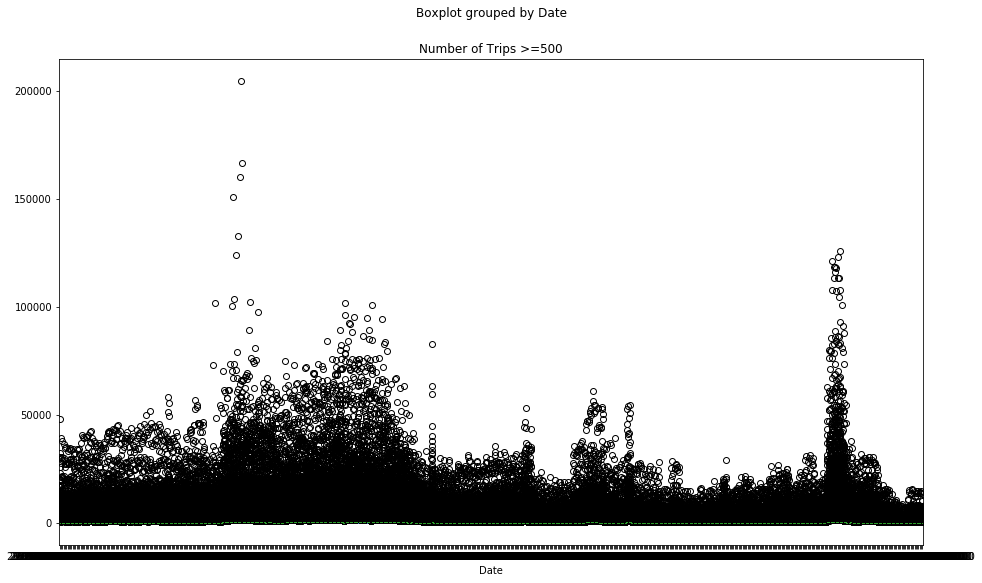

In [13]:
# Boxplot of number of trips above 500 miles
trip_data_clean.boxplot(by ='Date', 
                        column =['Number of Trips >=500'], 
                        figsize=(15,9), 
                        grid = False)

Using all of the observations in one graph is mostly convoluted and ineffective, so in order to make our data more managable and focused, we're going to narrow our analysis to California counties. Even amidst the overcrowding in the above plot, we can see the general ups and downs of travel displayed. The trend is what we originally expected. There are more trips in the first half of the graph (2019) with a drop across most of 2020, and a dramatic spike during the summer (August 2020). Finally, there is a drop at the end of the data during the Fall. To better explain this trend, we might need to supplement with Covid-19 data.

### Filtering Data to California Counties

In [14]:
# Filtering to California counties
trip_data_clean_CA = trip_data_clean[trip_data_clean['State Postal Code']=='CA']

# Previewing filtered data
print('Shape:', trip_data_clean_CA.shape)
trip_data_clean_CA.head(5)

Shape: (38093, 19)


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500
89,County,2019-01-01,6.0,CA,6001.0,Alameda County,387930.0,1273729.0,4689018.0,1498736.0,1167294.0,511906.0,547995.0,659499.0,216985.0,50410.0,18542.0,5349.0,12302.0
90,County,2019-01-01,6.0,CA,6003.0,Alpine County,328.0,770.0,2692.0,629.0,686.0,149.0,196.0,218.0,506.0,228.0,80.0,0.0,0.0
91,County,2019-01-01,6.0,CA,6005.0,Amador County,9453.0,29810.0,98532.0,13691.0,23586.0,14228.0,12193.0,18232.0,10629.0,4525.0,1060.0,99.0,289.0
92,County,2019-01-01,6.0,CA,6007.0,Butte County,57517.0,173032.0,642628.0,178158.0,203203.0,87995.0,64251.0,55810.0,32636.0,12281.0,6330.0,867.0,1097.0
93,County,2019-01-01,6.0,CA,6009.0,Calaveras County,9464.0,35999.0,107948.0,14325.0,19901.0,14581.0,19746.0,22491.0,10424.0,4391.0,1806.0,160.0,123.0


Previously, there were 34,863 observations for California, so with the updated data we've gained 3,230 more observations.

In [15]:
# Summary information for datetime column
print("Datetime Data:\n")
print(trip_data_clean_CA['Date'].describe())

# Summary information for cleaned string columns
print("\nString Data:\n")
print(trip_data_clean_CA.describe(include=['O']))

# Summary information for cleaned numeric columns without scientific notation
with pd.option_context('float_format', '{:f}'.format):
    print("\nNumeric Data:\n\n", trip_data_clean_CA.describe())

Datetime Data:

count                   38093
unique                    663
top       2019-02-04 00:00:00
freq                       58
first     2019-01-01 00:00:00
last      2020-10-24 00:00:00
Name: Date, dtype: object

String Data:

         Level State Postal Code    County Name
count    38093             38093          38093
unique       1                 1             58
top     County                CA  Lassen County
freq     38093             38093            663

Numeric Data:

         State FIPS  County FIPS  Population Staying at Home  \
count 38093.000000 38093.000000                38093.000000   
mean      6.000000  6058.269420               154315.019951   
std       0.000000    33.293428               335062.554489   
min       6.000000  6001.000000                  153.000000   
25%       6.000000  6029.000000                10581.000000   
50%       6.000000  6059.000000                44414.000000   
75%       6.000000  6087.000000               150289.000000   
ma

In [16]:
# List unique values in the 'County Name' column
counties_list_CA = trip_data_clean_CA['County Name'].unique().tolist()

print(counties_list_CA)

['Alameda County', 'Alpine County', 'Amador County', 'Butte County', 'Calaveras County', 'Colusa County', 'Contra Costa County', 'Del Norte County', 'El Dorado County', 'Fresno County', 'Glenn County', 'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County', 'Kings County', 'Lake County', 'Lassen County', 'Los Angeles County', 'Madera County', 'Marin County', 'Mariposa County', 'Mendocino County', 'Merced County', 'Modoc County', 'Mono County', 'Monterey County', 'Napa County', 'Nevada County', 'Orange County', 'Placer County', 'Plumas County', 'Riverside County', 'Sacramento County', 'San Benito County', 'San Bernardino County', 'San Diego County', 'San Francisco County', 'San Joaquin County', 'San Luis Obispo County', 'San Mateo County', 'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County', 'Shasta County', 'Sierra County', 'Siskiyou County', 'Solano County', 'Sonoma County', 'Stanislaus County', 'Sutter County', 'Tehama County', 'Trinity County', 'Tulare Coun

### Exploratory Visualizations: California Data

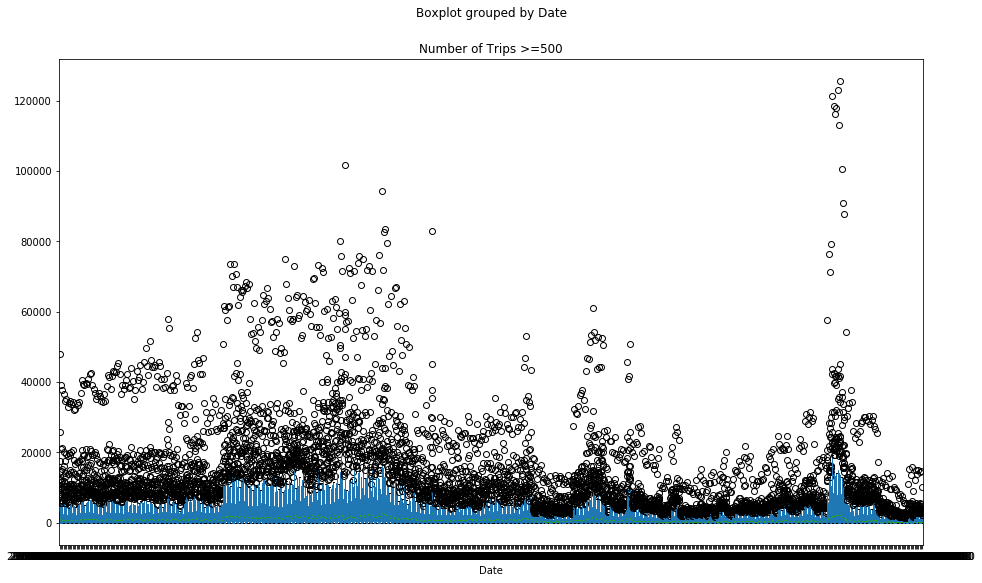

In [17]:
# Boxpot of trips greater than 500 miles in California
trip_data_clean_CA.boxplot(by ='Date', 
                           column =['Number of Trips >=500'], 
                           figsize=(15,9), 
                           grid = False)

This boxplot looks slightly better than the last plot, and conveys the same overall trend, but there are still too many data to be illustrated effectively in a boxplot. Next, we will try a few scatterplots.

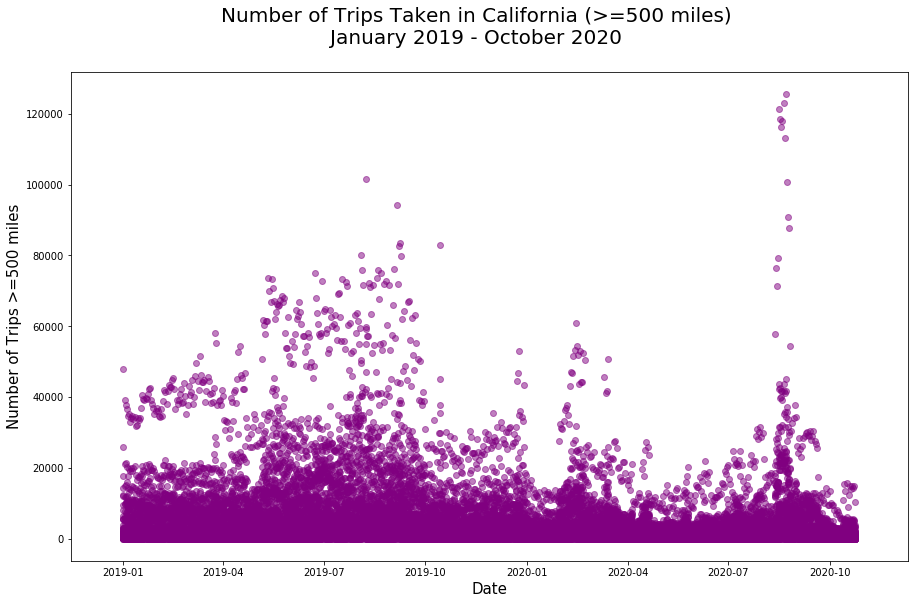

In [18]:
# Scatterplot of California trips above 500 miles

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

# Add x-axis and y-axis
ax.scatter(trip_data_clean_CA['Date'],
       trip_data_clean_CA['Number of Trips >=500'],
       color='purple', alpha=0.5)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Trips >=500 miles', fontsize=15)
plt.suptitle('Number of Trips Taken in California (>=500 miles)\nJanuary 2019 - October 2020', fontsize=20)

plt.show()

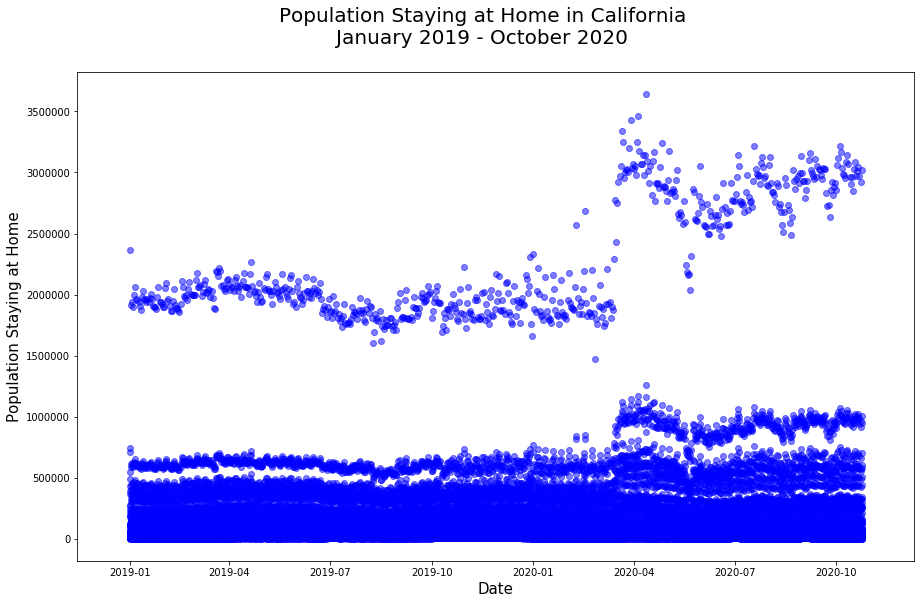

In [19]:
# Scatterplot of California Population Staying at Home

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

# Add x-axis and y-axis
ax.scatter(trip_data_clean_CA['Date'],
       trip_data_clean_CA['Population Staying at Home'],
       color='blue', alpha=0.5)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Population Staying at Home', fontsize=15)
plt.suptitle('Population Staying at Home in California\nJanuary 2019 - October 2020', fontsize=20)

plt.show()

The first scatterplot depicting trips taken in California follows the expected pattern, while the second scatterplot depicting the population staying at home shows an opposite pattern but still expected. This makes sense that trips taken would be negatively correlated with population staying at home. In general, the less trips taken, the more people are staying at home.  

To account for the dramatic change in trips taken and population staying at home beginning in March of 2020, it will be helpful to look at Covid-19 cases in California.

## Covid-19 Supplemental Data

Data Source: <https://data.ca.gov/dataset/covid-19-cases/resource/926fd08f-cc91-4828-af38-bd45de97f8c3>

### Loading Data

In [20]:
# Loading data into a Pandas DataFrame
covid_data_CA = pd.read_csv("statewide_cases.csv")

# Checking dimensions
print(covid_data_CA.shape)

# Previewing data
covid_data_CA.head(5)

(13925, 6)


,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,Santa Clara,151.0,6.0,151,6,2020-03-18
1,Santa Clara,183.0,8.0,32,2,2020-03-19
2,Santa Clara,246.0,8.0,63,0,2020-03-20
3,Santa Clara,269.0,10.0,23,2,2020-03-21
4,Santa Clara,284.0,13.0,15,3,2020-03-22


Previously, our data included 11,225 rows, but now with updated data we have 13,925.

### Cleaning Covid-19 Data

In [21]:
# Checking missing data sums
covid_data_CA.isna().sum()

county                 0
totalcountconfirmed    3
totalcountdeaths       2
newcountconfirmed      0
newcountdeaths         0
date                   0
dtype: int64

In [22]:
# Removing missing data
covid_data_CA_clean = covid_data_CA.dropna()

# Checking missing data sums
covid_data_CA_clean.isna().sum()

county                 0
totalcountconfirmed    0
totalcountdeaths       0
newcountconfirmed      0
newcountdeaths         0
date                   0
dtype: int64

In [23]:
covid_data_CA_clean.dtypes

county                  object
totalcountconfirmed    float64
totalcountdeaths       float64
newcountconfirmed        int64
newcountdeaths           int64
date                    object
dtype: object

In [24]:
# Converting dates to datetime format
covid_data_CA_clean['date'] = pd.to_datetime(covid_data_CA_clean['date'])

covid_data_CA_clean['date'].head(10)

/Users/corinnemedeiros/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0   2020-03-18
1   2020-03-19
2   2020-03-20
3   2020-03-21
4   2020-03-22
5   2020-03-23
6   2020-03-24
7   2020-03-25
8   2020-03-26
9   2020-03-27
Name: date, dtype: datetime64[ns]

In [25]:
# Summary information for datetime column
print("Datetime Data:\n")
print(covid_data_CA_clean['date'].describe())

Datetime Data:

count                   13922
unique                    233
top       2020-09-01 00:00:00
freq                       60
first     2020-03-18 00:00:00
last      2020-11-05 00:00:00
Name: date, dtype: object


This updated data set includes up until November 5, 2020.

### Plotting Covid-19 Data

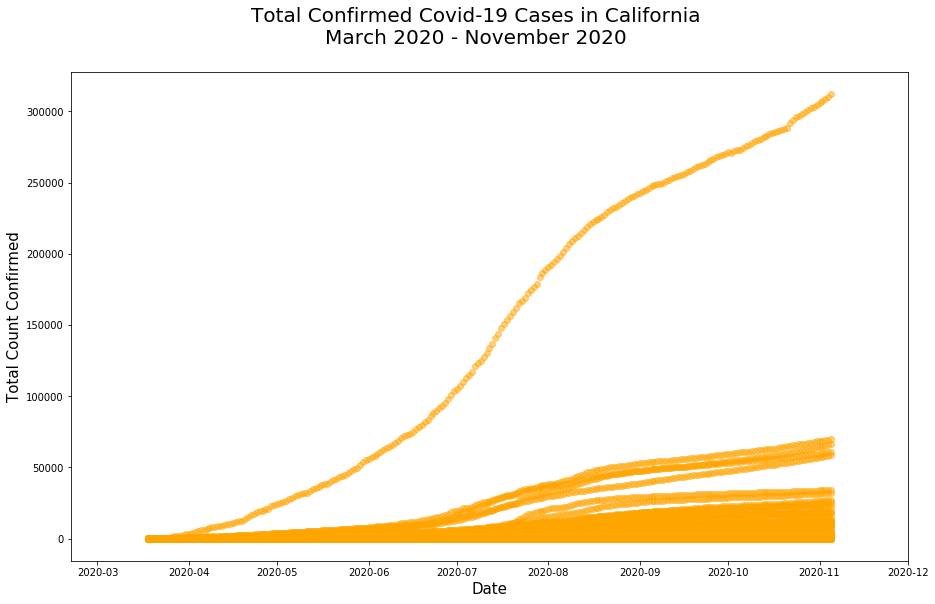

In [26]:
# Scatterplot of California Covid-19 cases

# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 9))

# Add x-axis and y-axis
ax.scatter(covid_data_CA_clean['date'],
       covid_data_CA_clean['totalcountconfirmed'],
       color='orange', alpha=0.5)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Count Confirmed', fontsize=15)
plt.suptitle('Total Confirmed Covid-19 Cases in California\nMarch 2020 - November 2020', fontsize=20)

plt.show()

From this graph we can confirm that the amount of Covid-19 cases started rising in March of 2020, right as the number of trips taken started decreasing and the population staying at home started increasing. With the newly added data, we can see the recent even more dramatic rise in cases during our current month of November 2020.

At this point, we'll save our cleaned data as csv files to import into RStudio for modeling.

### Saving Cleaned Data

In [29]:
# Writing cleaned CA trip data to csv file
trip_data_clean_CA.to_csv('Trips_by_Distance_CA_clean.csv', index_label=False)

In [30]:
# Writing cleaned CA Covid-19 data to csv file
covid_data_CA_clean.to_csv('covid_data_CA_clean.csv', index_label=False)